# **DS331 Lab 2: Case Study - AI in Healthcare**
### Understanding Patient Health Patterns & Treatment Needs [CRISP-DM Phase2]

## **📌 Case Study Overview**

This case study explores clinical patient data to uncover insights into health indicators, diagnoses, medication patterns, and healthcare access. Using descriptive statistics (measures of central tendency, dispersion, and association) and visualization tools, we aim to:

- Analyze patterns in patient vitals, diagnoses, and treatments.
- Identify relationships between symptoms, risk factors, and outcomes.
- Evaluate how demographic features correlate with medical conditions.
- Examine medication usage and family history in predicting health risks.
- Spot trends that may guide healthcare planning and resource allocation.

The analysis follows the CRISP-DM methodology, focusing on data understanding before cleaning, feature engineering, and predictive modeling.

---

## **📂 Dataset Overview**

This dataset provides individual-level insights on patient demographics, vitals, diagnoses, medications, allergies, and risk factors.

To facilitate analysis, the features are categorized into meaningful groups based on their purpose and relevance:

---

🆔 Core Identifiers

| Feature Name   | Description  |
|----------------|--------------|
| Patient_ID | Unique identifier for each patient. |
| Gender     | Patient’s gender (Male, Female). |
| Age        | Age of the patient in years. |

---

❤ Vitals & Health Metrics

| Feature Name       | Description  |
|--------------------|--------------|
| Blood_Pressure | Systolic blood pressure (mmHg). | (Blood pressure when the heart is contracting)
| Heart_Rate     | Heart rate (beats per minute). |
| Temperature    | Body temperature (°C). |

---

🩺 Diagnosis & Conditions

| Feature Name   | Description  |
|----------------|--------------|
| Diagnosis  | Primary diagnosis or condition. |
| Allergies  | Known allergies. |
| Family_History | Presence of hereditary conditions (diabetes, heart disease ect). |

---

💊 Medication & Treatment

| Feature Name  | Description  |
|---------------|--------------|
| Medication| Medications prescribed to the patient. |
| Treatment_Response | Response to treatment (If Improved or no change). |

---

⭐ Healthcare Experience

| Feature Name         | Description  |
|----------------------|--------------|
| Patient_Satisfaction | Satisfaction rating (Low, Medium, High). |
| Follow_Up_Needed     | Indicator for if a follow-up visit is required. |

---

### 📥 Download AI in HealthCare Dataset  
[<button style="background-color:#008CBA; color:white; padding:10px 15px; border:none; border-radius:5px;">Click Here to Download</button>](https://drive.google.com/drive/folders/18UHGmcat5yFGkQPmzgwkntlCnMz89UCw?usp=drive_link)

## **Task 1 & 2: Data Collection & Description**

In [96]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display


df = pd.read_csv("AI_in_HealthCare_Dataset.csv")
print(df.head())

   Patient_ID  Age  Gender  Blood_Pressure  Heart_Rate  Temperature  \
0           1   62  Female      102.349134   79.827209    98.912361   
1           2   65    Male      137.760933   72.817449    98.912508   
2           3   82    Male       97.618564   57.135424    99.189728   
3           4   85    Male      121.743752   67.355838    96.033487   
4           5   85    Male      129.530450   64.849416    99.077675   

       Diagnosis    Medication  Treatment_Duration Insurance_Type  \
0   Hypertension       Statins                  24      Uninsured   
1   Hypertension       Insulin                  29      Uninsured   
2      Influenza  Chemotherapy                  15        Private   
3  Heart Disease  Chemotherapy                   5        Private   
4  Heart Disease       Insulin                  10        Private   

   Doctor_Name        Hospital_Name  Lab_Test_Results X-ray_Results  \
0    Dr. Brown  Children's Hospital        114.906151      Abnormal   
1     Dr. Wang  

In [98]:
# ----------------------------
# Dataset Structure and Properties
# ----------------------------

# Display dataset dimensions (number of rows and columns)
print("Dataset Dimensions:", df.shape)

# Create and display a structured summary of dataset features
df_info = pd.DataFrame({
    "Column Name": df.dtypes.index,
    "Data Type": df.dtypes.values,
    "Sample Values": [df[col].dropna().unique()[:5] for col in df.columns]  # Show up to 3 unique sample values
})

print("\nDataset Features:")
display(df_info)

Dataset Dimensions: (5000, 20)

Dataset Features:


,Column Name,Data Type,Sample Values
0,Patient_ID,int64,"[1, 2, 3, 4, 5]"
1,Age,int64,"[62, 65, 82, 85, 27]"
2,Gender,object,"[Female, Male]"
3,Blood_Pressure,float64,"[102.34913367982614, 137.76093329695257, 97.61..."
4,Heart_Rate,float64,"[79.82720949964546, 72.81744865909039, 57.1354..."
5,Temperature,float64,"[98.91236105995344, 98.9125076063261, 99.18972..."
6,Diagnosis,object,"[Hypertension, Influenza, Heart Disease, Cance..."
7,Medication,object,"[Statins, Insulin, Chemotherapy, Aspirin, Anti..."
8,Treatment_Duration,int64,"[24, 29, 15, 5, 10]"
9,Insurance_Type,object,"[Uninsured, Private, Medicaid, Medicare]"


## **Task 3: Data Exploration**

### **📊 Measures of Central Tendency**

In [103]:

# Select numerical features for central tendency analysis
central_tendency_features = [
    "Age",
    "Blood_Pressure",
    "Heart_Rate",
    "Temperature",
    "Treatment_Duration",
    "Recovery_Time",
    "Patient_Satisfaction",
    "AI_Diagnosis_Confidence"
]

# Compute Mean, Median, and Mode for each feature
central_tendency_stats = pd.DataFrame({
    "Mean": df[central_tendency_features].mean(),
    "Median": df[central_tendency_features].median(),
    "Mode": df[central_tendency_features].mode().iloc[0]
})

# Display the statistics
print("Central Tendency Measures:")
print(central_tendency_stats)


Central Tendency Measures:
                               Mean      Median       Mode
Age                       53.433200   53.000000  21.000000
Blood_Pressure           119.863621  119.772157  61.940115
Heart_Rate                74.755327   75.000152  36.760595
Temperature               98.603710   98.618301  94.930131
Treatment_Duration        14.965400   15.000000   1.000000
Recovery_Time              4.944200    5.000000   2.000000
Patient_Satisfaction       2.993600    3.000000   4.000000
AI_Diagnosis_Confidence    0.843927    0.843321   0.700017


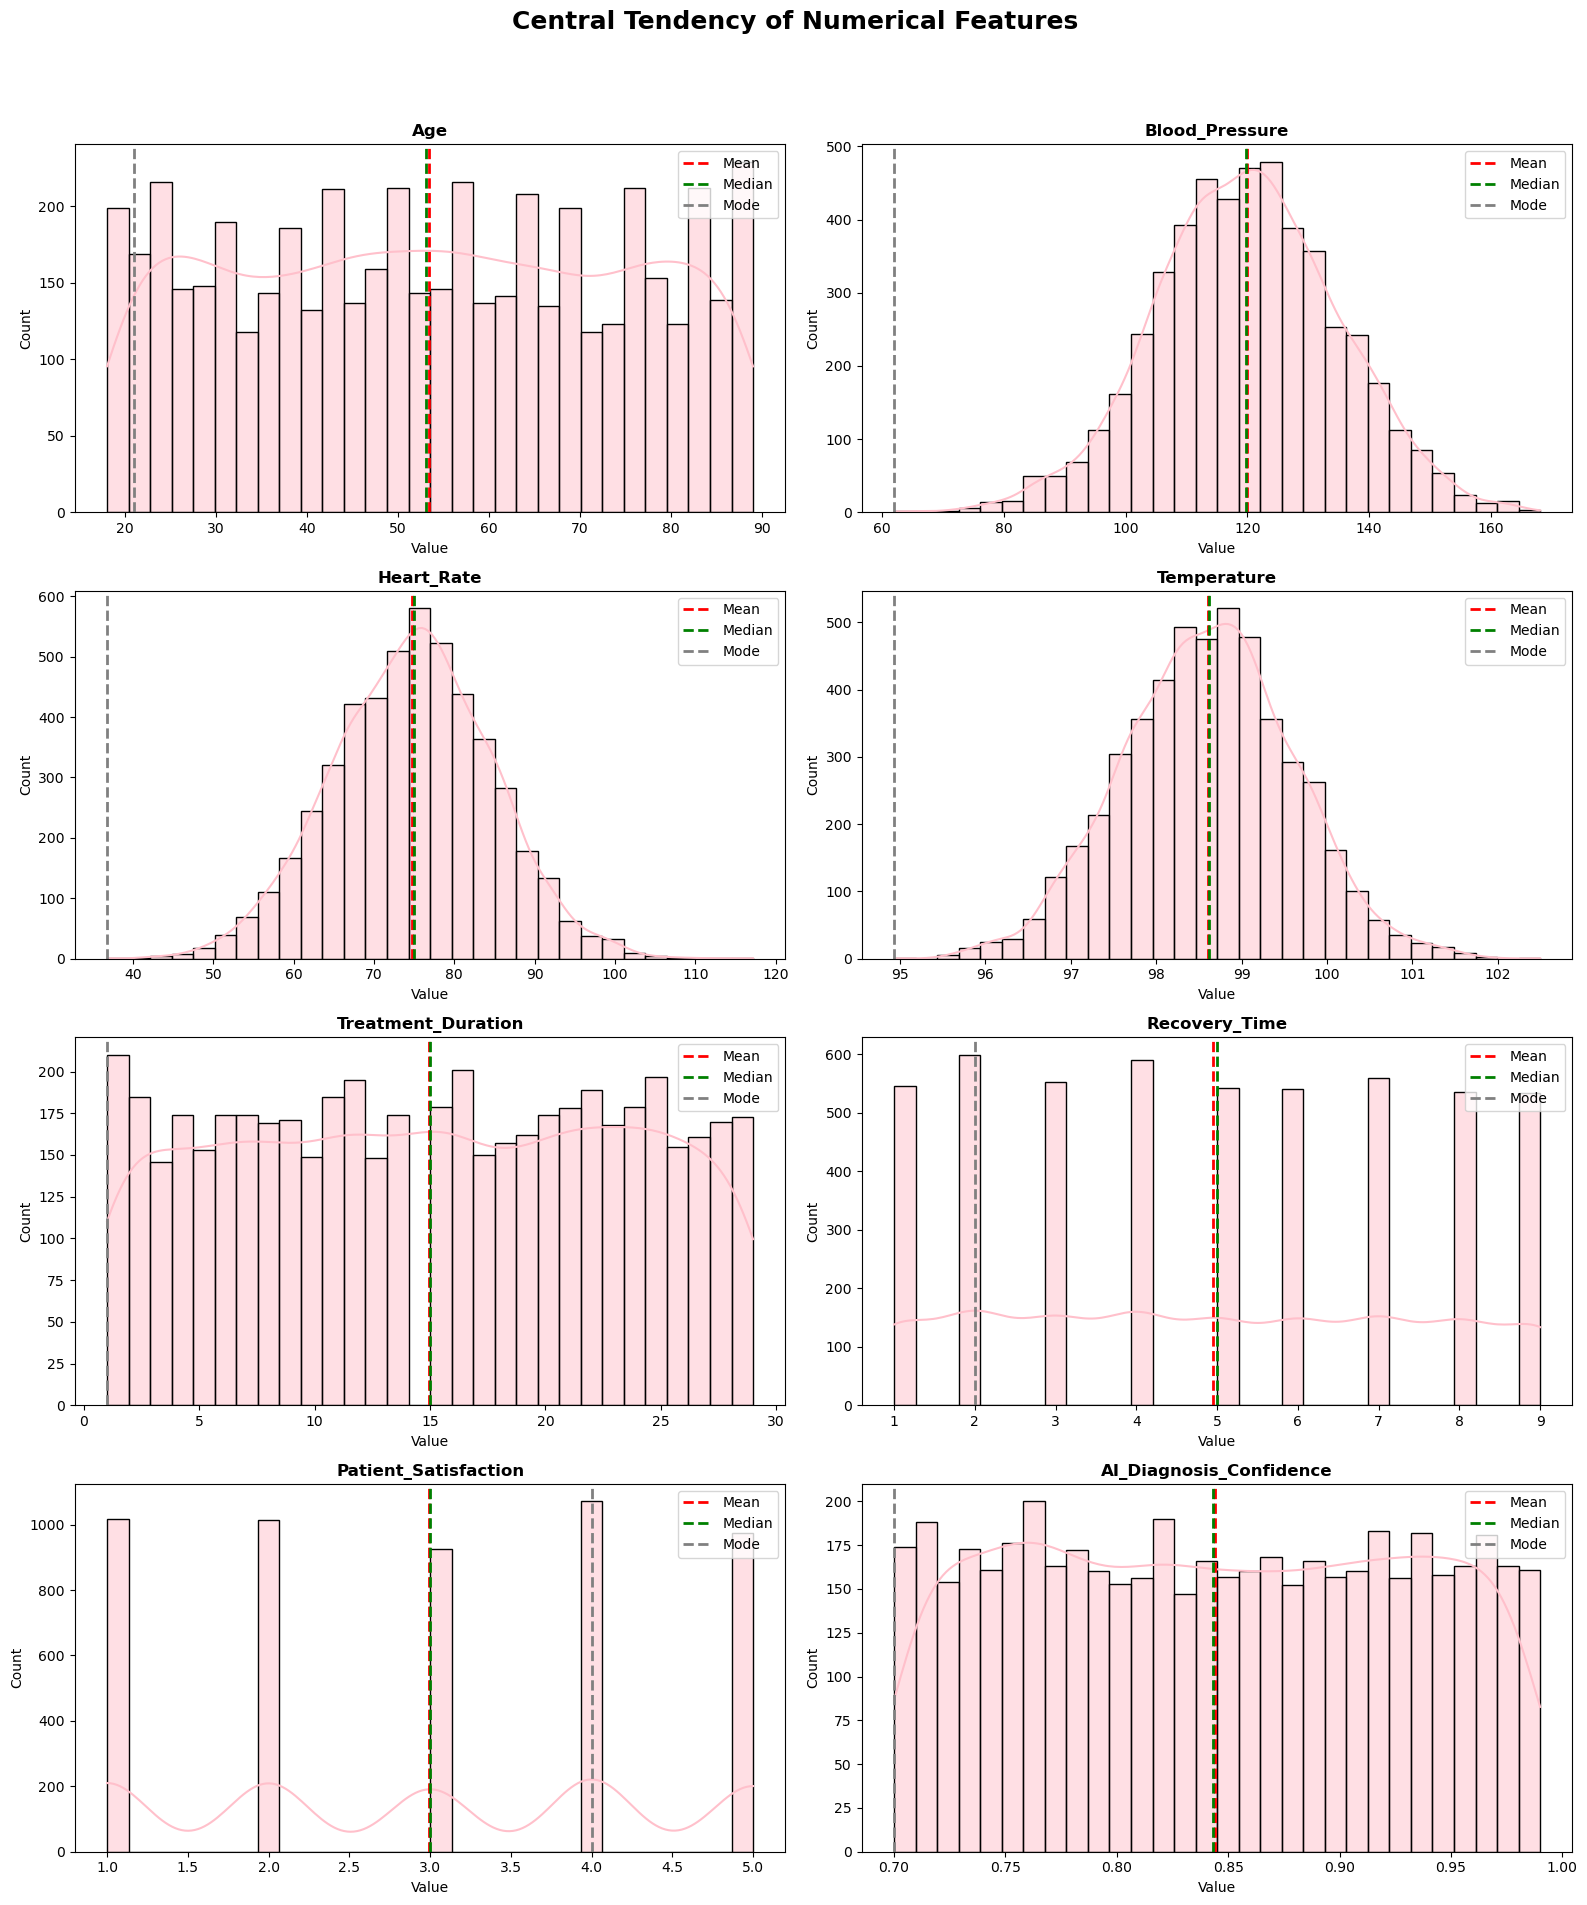

In [105]:
# Visualization of Central Tendency Measures (Histograms)
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to plot

central_tendency_features = [
    "Age",
    "Blood_Pressure",
    "Heart_Rate",
    "Temperature",
    "Treatment_Duration",
    "Recovery_Time",
    "Patient_Satisfaction",
    "AI_Diagnosis_Confidence"
]

# Set up the plot grid
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle("Central Tendency of Numerical Features", fontsize=18, fontweight='bold')

# Loop through each feature and draw histogram
for i, feature in enumerate(central_tendency_features):
    row, col = divmod(i, 2)

    # Create histogram with KDE curve
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[row, col], color="#FFC0CB")  # Baby pink

    # Add mean, median, and mode lines
    axes[row, col].axvline(df[feature].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[row, col].axvline(df[feature].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    axes[row, col].axvline(df[feature].mode().values[0], color='gray', linestyle='dashed', linewidth=2, label='Mode')

    # Add labels and legend
    axes[row, col].set_title(feature, fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel("Value", fontsize=10)
    axes[row, col].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 💡 **Key Insights from Measures of Central Tendency**


###  **🧓 Age:**
**Distribution is nearly symmetric**, but there’s a notable cluster of very young patients at age 21.
###  **🩸 Blood Pressure:** 
**Nearly normal distribution** around 120 mmHg, with a very low outlier at 61.94
### **💓 Heart Rate:**
**Centered around 75 bpm** with a slight left skew due to a very low outlier (36.76).
###  **🌡 Temperature:**
**Nearly normal** around 98–99°F; a left skew caused by a low outlier (94.93°F).
###  **⏳Recovery Time:**
**Most patients recover in 1–2 days**; left skew with a long tail up to 9 days.
###  **🙂 Patient Satisfaction:** 
**Fairly even distribution**, slightly skewed toward higher ratings; no outliers
###  **🤖 AI Diagnosis Confidence:** 
**Mostly high confidence (0.8–0.99)**, with a low cluster at 0.7 indicating uncertain predictions.

### **📊 Measures of Dispersion**

In [112]:
# ----------------------------
# Compute Measures of Dispersion
# ----------------------------

# Features chosen:
dispersion_features = ["Treatment_Duration", "Recovery_Time"]

# Compute dispersion measures (standard deviation, range, and interquartile range)
dispersion_stats = pd.DataFrame(index=dispersion_features)
dispersion_stats["Standard Deviation"] = df[dispersion_features].std()
dispersion_stats["Range"] = df[dispersion_features].max() - df[dispersion_features].min()
dispersion_stats["IQR"] = df[dispersion_features].quantile(0.75) - df[dispersion_features].quantile(0.25)

# Display the computed statistics
print("\n📊 Measures of Dispersion")
display(dispersion_stats)


📊 Measures of Dispersion


,Standard Deviation,Range,IQR
Treatment_Duration,8.403495,28,14.0
Recovery_Time,2.570994,8,4.0


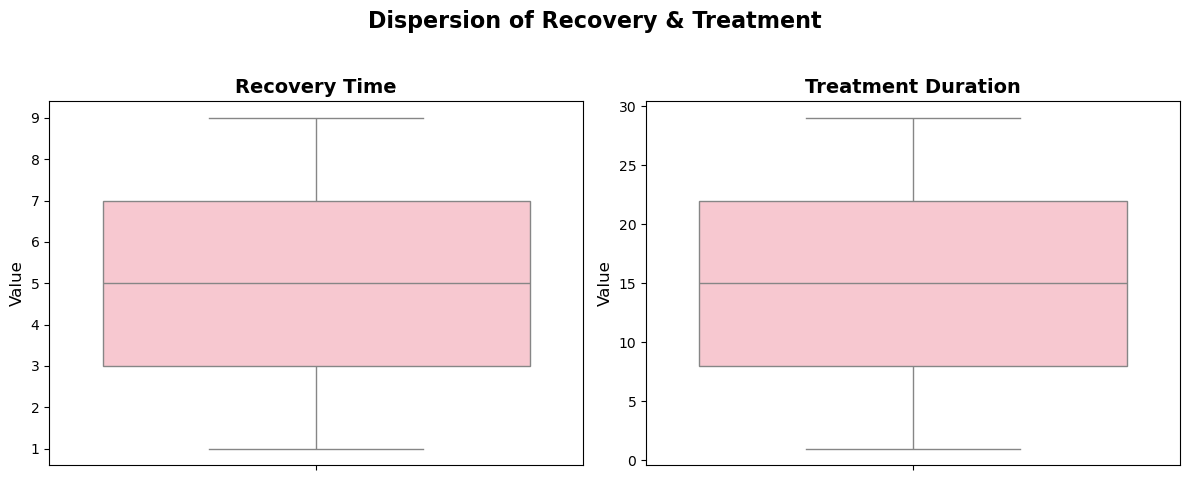

In [165]:
dispersion_features = ["Recovery_Time", "Treatment_Duration"]

fig, axes = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle("Dispersion of Recovery & Treatment", fontsize = 16, fontweight = 'bold')

for i, feature in enumerate(dispersion_features):
    sns.boxplot(y = df[feature], ax=axes[i], color = "#FFC0CB")
    axes[i].set_title(feature.replace("_", " ").title(), fontsize = 14, fontweight = 'bold')
    axes[i].set_ylabel("Value", fontsize = 12)

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

#### **Key Insights from Measures of Dispersion**

Below are some key insights drawn from the measures of **dispersion**: standard deviation, range, and interquartile range (IQR).

#### **Recovery Time**
- **Standard Deviation:** 2.57 | **Range:** 8 | **IQR:** 4  
- **Insight:**  
  - The **low standard deviation** indicates that recovery times were similar across most cases.
  - The **range of 8** indicates some slight differences between the shortest and longest recovery times.
  - The **IQR of 4** indicates that **50% of the data falls** within a range of approximately 4 days.
  - Overall, these indicators show that recovery times are **consistent**, with slight variations that may be due to differences in health conditions, patient response to treatment, and the influence of age.

#### **Treatment Duration**
- **Standard Deviation:** 8.40 | **Range:** 28 | **IQR:** 14  
- **Insight:** 
  - The **high standard deviation** of 8.40 indicates a **large degree of variation** in treatment duration.
  - The **range of 28** indicates that there are cases with **very short** and **very long*8 treatment periods.
  - The **IQR of 14** indicates that the **50% of the data is distributed** within a relatively **wide range**, indicating significant variation in treatment plans or patient response.
  - This variation requires further study to understand whether it is due to individual differences among patients, variations in treatment modalities, or differences in disease type.

### **📊 Measures of Association**

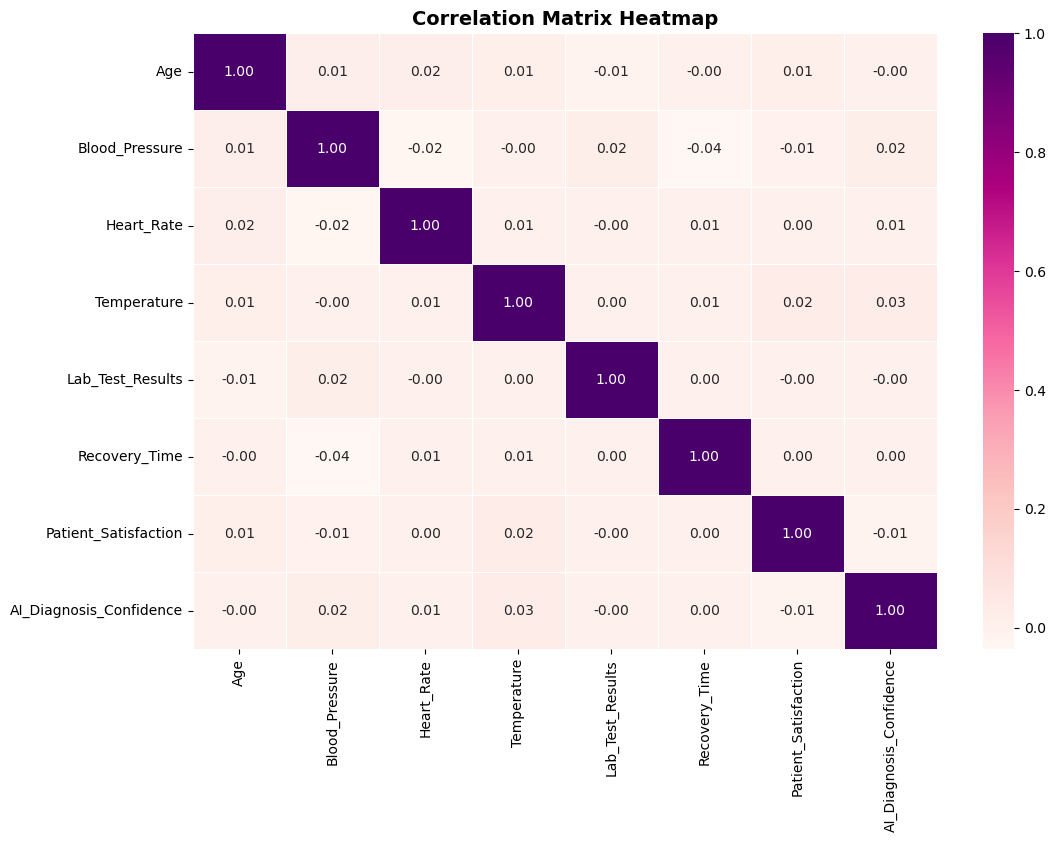

In [151]:
# ----------------------------
# Compute Measures of Association
# ----------------------------

# Features chosen:
association_features = ["Age", "Blood_Pressure", "Heart_Rate", "Temperature","Lab_Test_Results",
                        "Recovery_Time", "Patient_Satisfaction", "AI_Diagnosis_Confidence"]

# Compute correlation matrix for selected features
correlation_matrix = df[association_features].corr()

# ----------------------------
# Visualization of Measures of Association (Heatmap)
# ----------------------------

# Set up figure
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdPu", fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title("Correlation Matrix Heatmap", fontsize=14, fontweight='bold')

# Show heatmap
plt.show()

#### **🧐Correlation analysis summary**

**All correlations close to zero, which means there are no meaningful linear relationships between any of the features in the dataset.** We expected there to be a relationship between Age and Recovery Time, such as The younger the person, the faster their recovery. However, based on the heatmap, the relationship between them is non-existent. No clear exists for true (strong, moderate, or weak) correlations.

## **💡Key Insights from Selected Attribute's correlation**

Our dataset contains 5000 rows and 20 columns. In the data exploration we did the measures of central tendency, where we found the measures for   "Age",
    "Blood_Pressure",
    "Heart_Rate",
    "Temperature",
    "Treatment_Duration",
    "Recovery_Time",
    "Patient_Satisfaction",
    "AI_Diagnosis_Confidence" . The visualization for each shows that   🧓  Age: Distribution is nearly symmetric, but there’s a notable cluster of very young patients at age 21. 🩸 Blood Pressure:
Nearly normal distribution around 120 mmHg, with a very low outlier at 61.94
Heart Rate:
Centered around 75 bpm with a slight left skew due to a very low outlier (36.76).

#### **🌡 Temperature:**
Nearly normal around 98–99°F; a left skew caused by a low outlier (94.93°F).

#### **⏳Recovery Time:**
Most patients recover in 1–2 days; left skew with a long tail up to 9 days.

#### **🙂 Patient Satisfaction:**
Fairly even distribution, slightly skewed toward higher ratings; no outliers

#### **🤖 AI Diagnosis Confidence:**
Mostly high confidence (0.8–0.99), with a low cluster at 0.7 indicating uncertain predictions. The measures of dispersion for "Treatment_Duration", "Recovery_Time" were displayed by the box plots, which shows the Recovery Time had a
standard deviation: 2.57, range: 8, and IQR: 4 and the treatment duration had a standard deviation of 2.57, range: 8, and IQR: 4. Lastly, Measures of Association; where we show the association of "Age", "Blood_Pressure", "Heart_Rate", "Temperature","Lab_Test_Results",
                        "Recovery_Time", "Patient_Satisfaction", "AI_Diagnosis_Confidence" which shockingly showed that All correlations close to zero, which means there are no meaningful linear relationships between any of the features in the dataset. And the relationships between most of them is non-existent.-existent.